In [5]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

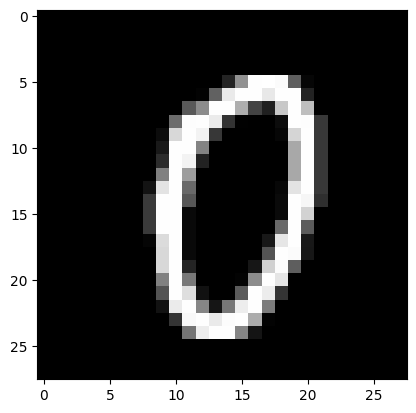

In [7]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

plt.figure()
plt.imshow(train_images[1000],cmap="gray")

In [8]:
train_images = tf.reshape(train_images,(train_images.shape[0],train_images.shape[1],train_images.shape[2],1))
test_images = tf.reshape(test_images,(test_images.shape[0],test_images.shape[1],test_images.shape[2],1))

In [9]:
model = tf.keras.models.Sequential([
    # 卷积层：6个5*5的卷积 sigmoid
    tf.keras.layers.Conv2D(filters=6, kernel_size=5,
                           activation="sigmoid", input_shape=(28, 28, 1)),
    # max pooling
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    # 卷积层：16 5*5 sigmoid
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation="sigmoid"),
    # max pooling
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    # 维度调整
    tf.keras.layers.Flatten(),
    
    # 全连接层，sigmoid
    tf.keras.layers.Dense(120, activation="sigmoid"),
    # 全连接层，sigmoid
    tf.keras.layers.Dense(84, activation="sigmoid"),
    
    # 输出层 softmax
    tf.keras.layers.Dense(10, activation="softmax")
])

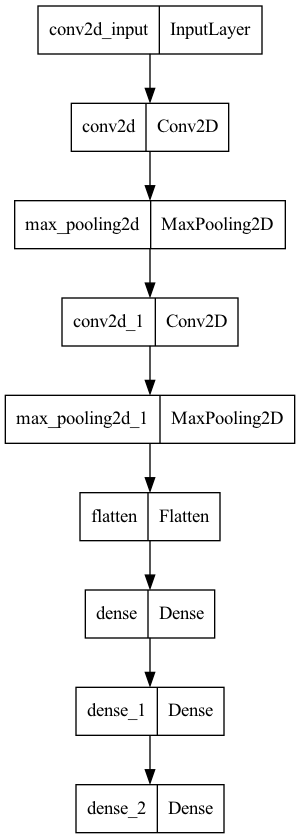

In [10]:
tf.keras.utils.plot_model(model)

In [11]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.9),
           loss = tf.keras.losses.sparse_categorical_crossentropy,
           metrics=["accuracy"])

model.fit(train_images,train_labels,epochs=5,batch_size=128,verbose=1)

Epoch 1/5


2023-04-11 19:54:28.495345: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 4s 8ms/step - loss: 1.1524 - accuracy: 0.5859
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1871 - accuracy: 0.9431
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1190 - accuracy: 0.9635
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0931 - accuracy: 0.9714
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0810 - accuracy: 0.9750


In [14]:
loss,accuracy = model.evaluate(test_images,test_labels,verbose=1)
print("损失值",loss)
print("准确率", accuracy)
# model.save("cnn_model.h5")
# model = tf.keras.models.load_model("cnn_model.h5")

313/313 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9771
损失值 0.07661401480436325
准确率 0.9771000146865845
